In [53]:
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt

In [30]:
def get_max_before_zero_vectorized(x):
    mask = np.roll(x == 0, 1)
    mask[0] = False
    if x[mask].size:
        return x[mask].max()
    return None


In [31]:
def get_max_before_zero_not_vectorized(x):
    ans = None
    for i in range(1, len(x)):
        if x[i - 1] == 0:
            if ans:
                ans = max(ans, x[i])
            else:
                ans = x[i]
    return ans


In [32]:
def get_max_before_zero_half_vectorized(x):
    mask = np.roll(x == 0, 1)
    mask[0] = False
    if x[mask].size:
        return max(x[mask])
    return None
            

In [27]:
def exec_time(f, x):
    start_time = time.time()
    f(x)
    return (time.time() - start_time)

Text(0.5, 0, 'Array size (ln(len))')

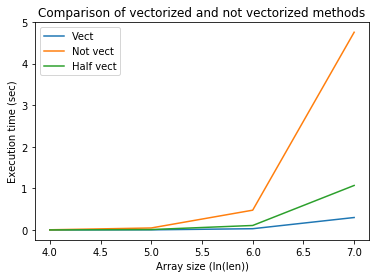

In [67]:
a_not_vect = [0, 1]*1000 + [0, 4]*3000 + [0, 2]*6000
s = [a_not_vect * (10**i) for i in range(0, 4) ]

vect_times = [exec_time(get_max_before_zero_vectorized, np.array(x)) for x in s]

not_vect_times = [exec_time(get_max_before_zero_not_vectorized, x) for x in s]

half_vect_times = [exec_time(get_max_before_zero_half_vectorized, np.array(x)) for x in s]

x = range(4, 8)
plt.plot(x, vect_times, label = 'Vect')
plt.plot(x, not_vect_times, label = 'Not vect')
plt.plot(x, half_vect_times, label = 'Half vect')
plt.title("Comparison of vectorized and not vectorized methods")
plt.legend()
plt.ylabel("Execution time (sec)")
plt.xlabel("Array size (ln(len))")

На первом месте по скорости находится векторизованный метод, на последнем - полностью не векторизованный.Причем разница на больших данных существенна.